# Decision Tree and Random Tree

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Read the data from the csv file**

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


Kyphosis is a spinal disorder
Age is in terms of months

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


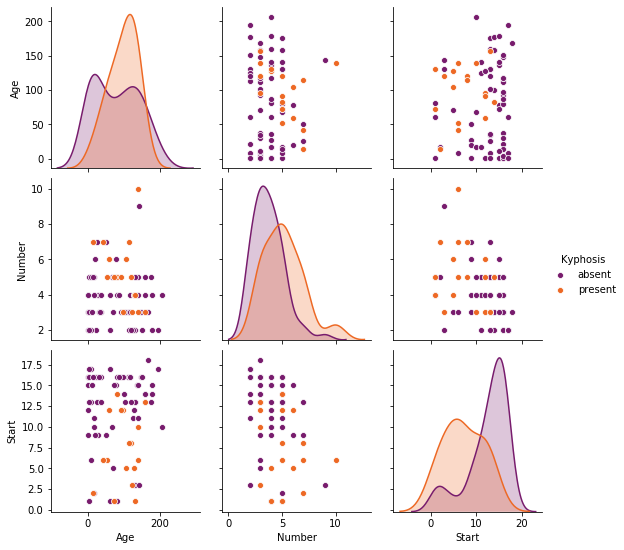

In [5]:
sns.pairplot(df, hue='Kyphosis',palette='inferno')

## Splitting and training our data

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=101)

## Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt = DecisionTreeClassifier()

In [11]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
prediction = dt.predict(X_test)

## Evaluation

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [14]:
print(classification_report(prediction,y_test))
print('\n')
print(confusion_matrix(prediction,y_test))

              precision    recall  f1-score   support

      absent       0.79      0.71      0.75        21
     present       0.25      0.33      0.29         6

    accuracy                           0.63        27
   macro avg       0.52      0.52      0.52        27
weighted avg       0.67      0.63      0.65        27



[[15  6]
 [ 4  2]]


## Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier(n_estimators=200)

In [21]:
rf.fit(X_train,y_train)
predictions = rf.predict(X_test)


## Evaluation

In [22]:
print(classification_report(predictions,y_test))
print('\n')
print(confusion_matrix(predictions,y_test))

              precision    recall  f1-score   support

      absent       1.00      0.76      0.86        25
     present       0.25      1.00      0.40         2

    accuracy                           0.78        27
   macro avg       0.62      0.88      0.63        27
weighted avg       0.94      0.78      0.83        27



[[19  6]
 [ 0  2]]


We couldn't observe much of a difference in the precision of decision tree and random forest as the data is small